<a href="https://colab.research.google.com/github/kcw0331/Environmental-Health-Big-Data-Analysis/blob/main/12%EC%A3%BC%EC%B0%A8/3-pandas_plotting_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The `pandas.plotting` module
Pandas provides some extra plotting functions for some new plot types.

## About the Data
In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis)).

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

* 먼저 facebook데이터를 읽어 온다.

## Scatter matrix
Easily create scatter plots between all columns in the dataset:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4da4442a90>,
      dtype=object)

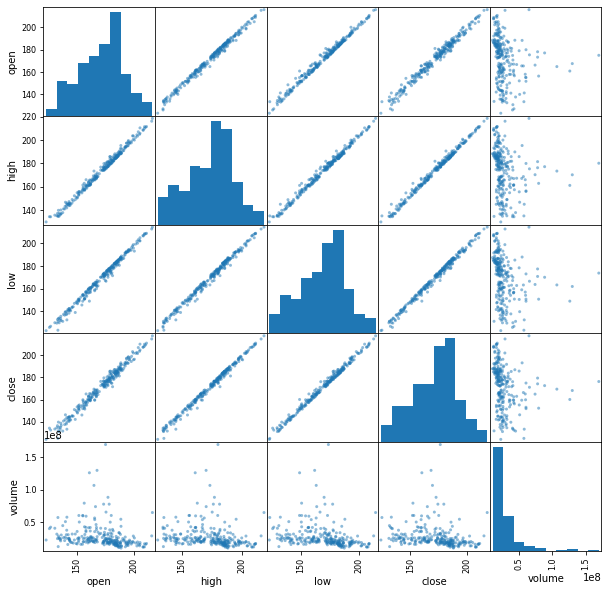

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

* scatter_matrix의 method를 불러와서 그려준다.

Changing the diagonal from histograms to KDE:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4da4299f50>,
      dtype=object)

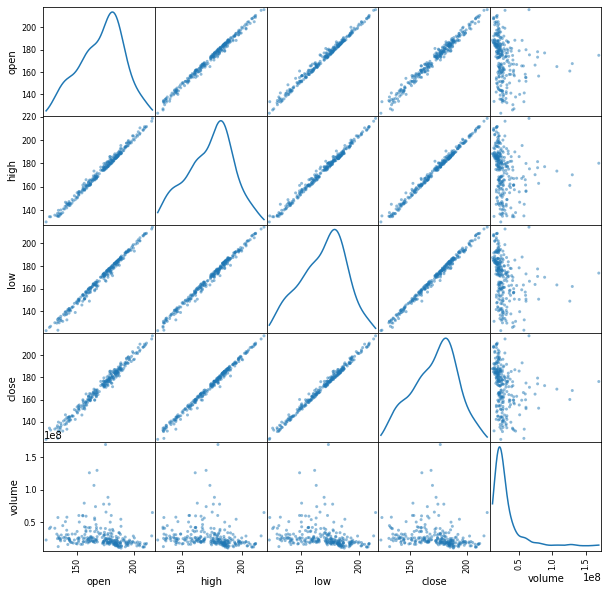

In [5]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

 * 가운데에 있는 histogram을 kde로 바꾸려면, diagonal = 'kde'로 바꾸어 주면 된다. 

## Lag plot
Lag plots let us see how the variable correlates with past observations of itself. Random data has no pattern:

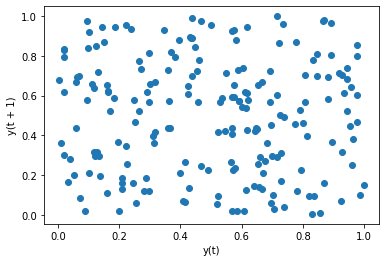

In [6]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

* lag plot은 현재 시점과 그 다음의 시점을 plot하여 현재 시점과 그 다음시점의 상관관계를 보여준다. 

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly autocorrelated:

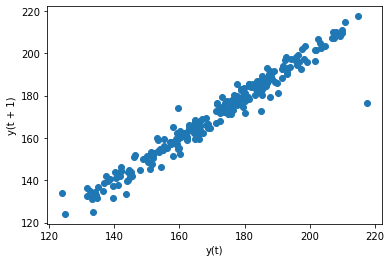

In [7]:
lag_plot(fb.close)

* facebook close를 하게 되면, 선형관계가 있는 것을 볼 수 있다. 

The default lag is 1, but we can alter this with the `lag` parameter. Let's look at a 5 day lag (a week of trading activity):

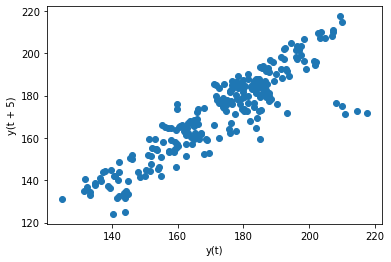

In [8]:
lag_plot(fb.close, lag=5)

* 여기에서는 lag를 5로 하여 관계를 시각화 해주는 것이다. 

## Autocorrelation plots
We can use the autocorrelation plot to see if this relationship may be meaningful or is just noise. Random data will not have any significant autocorrelation (it stays within the bounds below):

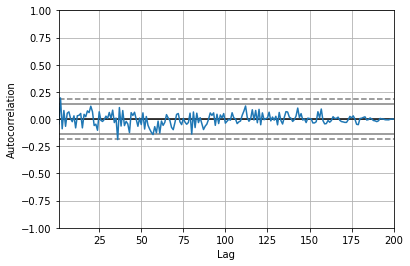

In [9]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

* Autocorrelation은 lag별로 correlation을 그려주는 것이다.

Stock data, on the other hand, does have significant autocorrelation:

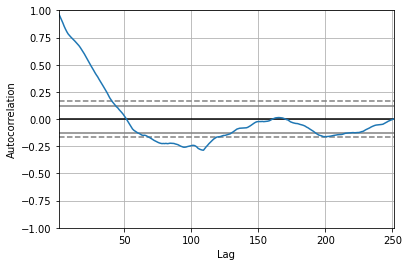

In [10]:
autocorrelation_plot(fb.close)

* facebook의 close의 Autocorrelation을 보면 유의하게 차이가 존재한다는 것을 알 수 있다. 

## Bootstrap plot
This plot helps us understand the uncertainty in our summary statistics:

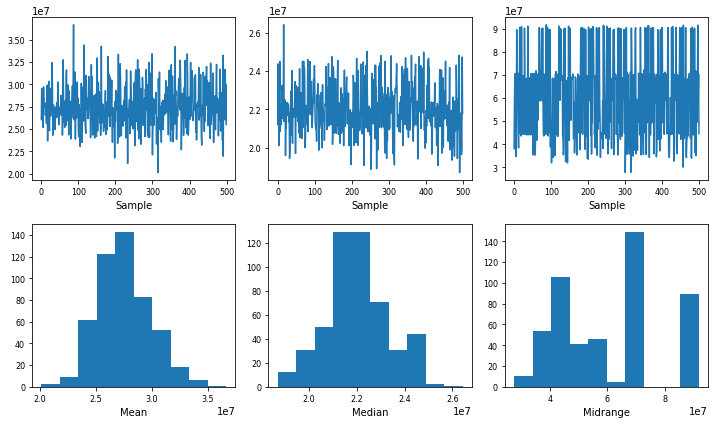

In [11]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

<hr>

<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./2-plotting_with_pandas.ipynb">
            <button>&#8592; Previous Notebook</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_05/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_06/1-introduction_to_seaborn.ipynb">
            <button>Chapter 6 &#8594;</button>
        </a>
    </div>
</div>
<hr>